# **Análisis de Datos – Práctica Guiada #2**

**Grado en Ingeniería Informática · Universidad Carlos III de Madrid**



In [1]:
# Por favor, incluid aquí los nombres de los miembros del grupo
#
# Alba Reinders Sánchez, 100383444, grupo 83
# Alejandro Valverde Mahou, 100383383, grupo 83

## Cuestiones previas

Por defecto, Colab carga la version 0.22 de *scikit-learn*, sin embargo, en este cuaderno haremos uso de algún parámetro exclusivo de la versión 0.23 (**no es imprescindible, pero sí cómodo**). Por este motivo, ejecutaremos la siguiente celda para procurar la actualización de la librería.

In [2]:
!pip3 install --upgrade scikit-learn -q

## Introducción

El *Iris flower data set* es un conjunto de dato que introdujo el estadístico y biólogo británico Ronald Fisher en 1936, y que ha sido empleado tradicionalmente como *banco de pruebas* para la validación de modelos de clasificación.

El conjunto de datos contiene mediciones sobre flores pertenecientes a plantas del género *iris*, y en particular a tres especies distintas: *setosa*, *versicolor* y *virginica*.

A continuación se muestra un ejemplos de cada especie:

![](./image1.jpeg)
En concreto hay 150 muestras (**instancias**), 50 para cada una de las especies (**clases**). Cada muestra tiene, además de la etiqueta de clase, la siguiente información (**atributos**):

*   Longitud del pétalo (en cm.)
*   Anchura del pétalo (en cm.)
*   Longitud del sépalo (en cm.) 
*   Anchura del sépalo (en cm.)

La estructura de los datos es por tanto la siguiente:

![](./image2.png)

## Carga de los datos

Hay dos formas razonablemente sencillas de cargar los datos:

* Obtener el [fichero CSV](http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data) que está alojado en el *UCI Machine Learning Repository*. Este se puede cargar con Pandas (ver [`pandas.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)), si bien será conveniente indicar los nombres de las columnas, pues el fichero no las contiene.

* Consultar el método [`sklearn.datasets.load_iris`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) que facilita la carga del conjunto de datos.

Ambas son correctas, aunque hay que prestar atención a las sutilezas (es decir, **la documentación**) de cada método.




In [3]:
import pandas as pd

In [4]:
### SOLUCIÓN
columns = ["Longitud del Sépalo", "Anchura del Sépalo", "Longitud del Pétalo", "Anchura del Pétalo", "Especie"]
data= pd.read_csv('iris.csv', names=columns)
###

A continuación vamos a mostrar el conjunto de datos para descubrir cómo está estructurado.

In [5]:
### SOLUCIÓN
display(data)
### 

,Longitud del Sépalo,Anchura del Sépalo,Longitud del Pétalo,Anchura del Pétalo,Especie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Análisis estadístico de los datos

Una buena forma de comenzar nuestro estudio podría consistir en investigar cómo varía cada uno de los parámetros para cada clase de flor. Para ello, basta con calcular los estadísticos que ya conocemos, agrupando el conjunto de datos por la clase (*puede ser útil consultar los apuntes de la sesión 2 y de la práctica guiada #1*).

**¿Hay diferencias apreciables en alguno de los atributos? ¿Cuál parece que puede ser una opción mejor para discriminar entre las diferentes clases?**

In [6]:
### SOLUCIÓN
data_by_class = data.groupby(["Especie"])
data_by_class.describe()
### 

Longitud del Sépalo                                         \
                              count   mean       std  min    25%  50%  75%   
Especie                                                                      
Iris-setosa                    50.0  5.006  0.352490  4.3  4.800  5.0  5.2   
Iris-versicolor                50.0  5.936  0.516171  4.9  5.600  5.9  6.3   
Iris-virginica                 50.0  6.588  0.635880  4.9  6.225  6.5  6.9   

                     Anchura del Sépalo         ... Longitud del Pétalo       \
                 max              count   mean  ...                 75%  max   
Especie                                         ...                            
Iris-setosa      5.8               50.0  3.418  ...               1.575  1.9   
Iris-versicolor  7.0               50.0  2.770  ...               4.600  5.1   
Iris-virginica   7.9               50.0  2.974  ...               5.875  6.9   

                Anchura del Pétalo                                            
                             count   mean       std  min  25%  50%  75%  max  
Especie                                                                       
Iris-setosa                   50.0  0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor               50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica                50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

## Visualización de los datos

Como siempre, puede ser adecuado incluir alguna visualización que nos permita entender mejor, y más gráficamente, cómo se estructuran los datos.

Un ejemplo podría ser un **gráfico de dispersión** (*scatter plot*) para cada par de variables, coloreando de forma diferenciada cada clase.

A pesar de que podríamos emplear *Matplotlib* como hicimos en sesiones anteriores, en este caso vamos a hacer uso en su lugar de **_Seaborn_**. Esta librería pone a nuestra disposición algunos métodos que facilitan notablemente el graficado.

**¿Cómo hacerlo**

Aunque hasta ahora no hemos empleado esta librería, no debería suponer ninguna dificultad. Para ayudarnos, consultaremos la documentación del método [`seaborn.pairplot`](http://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot) y consultaremos un ejemplo del gráfico denominado [*Scatterplot matrix*](http://seaborn.pydata.org/examples/scatterplot_matrix.html).

In [7]:
!pip3 install --upgrade seaborn -q
import seaborn as sns

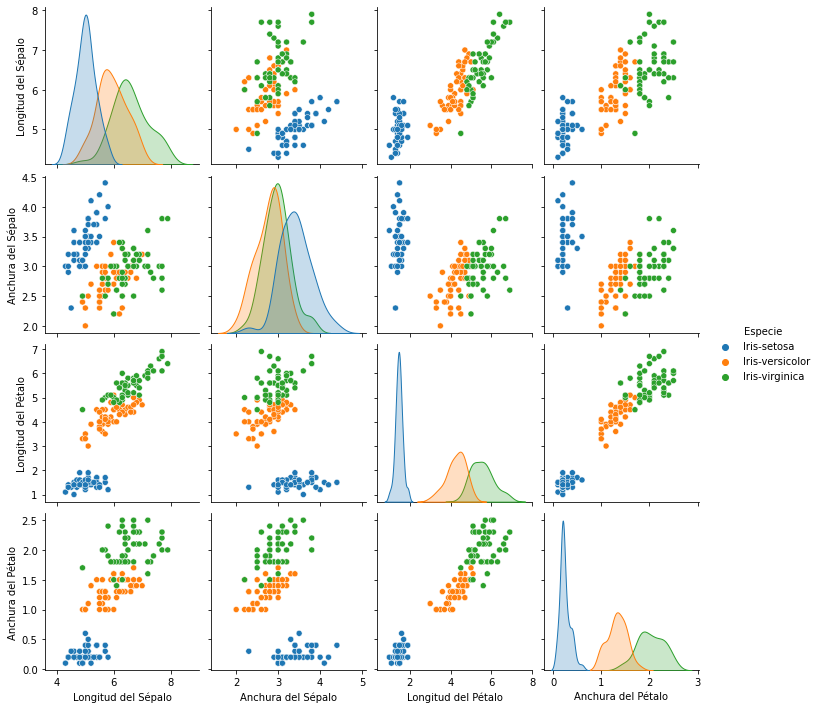

In [8]:
### SOLUCIÓN
sns.pairplot(data, hue="Especie")
### 

## Aprendizaje del modelo de regresión logística

El empleo de la regresión logística empleando *scikit-learn* es muy sencillo, y esencialmente idéntico al uso de otros clasificadores de esta librería. Basta con consultar la documentación de la clase [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).



In [9]:
from sklearn import linear_model

In [10]:
### SOLUCIÓN
model = linear_model.LogisticRegression()
X = data[columns[:-1]]
Y = data[columns[-1]]
model.fit(X, Y)
###

LogisticRegression()

A continuación, vamos a imprimir los parámetros (coeficientes y término independiente) de la regresión logística. 

**¿Qué dimensión tienen? ¿Por qué?**

In [11]:
### SOLUCIÓN
print(model.coef_)
print(model.intercept_)
###

[[-0.42340094  0.96168764 -2.51932329 -1.08618269]
 [ 0.53405008 -0.3178565  -0.20536638 -0.93956343]
 [-0.11064915 -0.64383113  2.72468967  2.02574612]]
[  9.8809069    2.21930096 -12.10020785]


## Evaluación del modelo de clasificación

A continuación vamos a calcular el porcentaje de aciertos de la clasificación. En castellano, a veces denominamos esta métrica con el nombre de *precisión*, si bien en inglés se denomina *accuracy*, que es un concepto distinto al de *precision*.

Esta métrica no es más que el número de aciertos dividido entre el total de muestras. 

¿Cómo podemos calcularlo? Evidentemente, podemos realizar la clasificación de muestras cuya clase (etiqueta) conocemos y comparar la clase real con la predicha. No obstante, también podemos consultar en la documentación la función `score` de la clase `LogisticRegression`, ya que puede sernos útil para este propósito.

**¿Cómo se comporta el modelo? ¿El resultado es bueno?**

**Puedes probar a _jugar_ con los parámetros de la regresión logística. ¿Cambia el resultado?**

In [12]:
### SOLUCIÓN
print(str(model.score(X, Y) * 100) + '%')
###

97.33333333333334%


Una ventaja de la regresión logística es que la salida puede interpretarse en términos de *confianza*, o incluso de probabilidad. Esto es debido a que la salida para cada clase es numérica, y suman 1 (100%).

A continuación, vamos a comprobar las probabilidades que devuelve el modelo para tres muestras aleatorias, una de cada clase. Se ha proporcionado casi todo el código (¡aunque es conveniente que trates de entenderlo!). Solo tienes que rellenar una línea de código. Puedes mirar la documentación de la clase `LogisticRegression` para ver qué función resulta más adecuada.

In [13]:
import random

classes = model.classes_
rand_samples = {classes[i]: X.iloc[[random.randint(i*50, i*50 + 49)]] for i in range(len(classes))}

for cls, samp in rand_samples.items():
  print(f"The class is {cls}")
  print(f"The sample is:\n{samp}")
  
  ### SOLUCIÓN
  proba = model.predict_proba(samp)
  ###

  print("The probabilities computed by Log. Regr. are:")
  for i in range(len(classes)):
    print(f" - {classes[i]}: {100*proba[0][i]:.2f} %")
  print("\n")

The class is Iris-setosa
The sample is:
    Longitud del Sépalo  Anchura del Sépalo  Longitud del Pétalo  \
14                  5.8                 4.0                  1.2   

    Anchura del Pétalo  
14                 0.2  
The probabilities computed by Log. Regr. are:
 - Iris-setosa: 98.81 %
 - Iris-versicolor: 1.19 %
 - Iris-virginica: 0.00 %


The class is Iris-versicolor
The sample is:
    Longitud del Sépalo  Anchura del Sépalo  Longitud del Pétalo  \
83                  6.0                 2.7                  5.1   

    Anchura del Pétalo  
83                 1.6  
The probabilities computed by Log. Regr. are:
 - Iris-setosa: 0.04 %
 - Iris-versicolor: 34.96 %
 - Iris-virginica: 64.99 %


The class is Iris-virginica
The sample is:
     Longitud del Sépalo  Anchura del Sépalo  Longitud del Pétalo  \
106                  4.9                 2.5                  4.5   

     Anchura del Pétalo  
106                 1.7  
The probabilities computed by Log. Regr. are:
 - Iris-set